### Image Search Application without tensorflow

In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from numpy import *

In [2]:
img = Image.open("cat.jpg")

In [3]:
search_histogram = array(img.histogram())
type(search_histogram)

numpy.ndarray

In [4]:
search_histogram.shape

(768L,)

In [5]:
import os
path= "/image/"

In [6]:
allfile = os.listdir(path)

In [7]:
from scipy.spatial import distance

In [9]:
import matplotlib.pyplot as plt
distance= []
hist= []
for file in allfile:
  image = Image.open(os.path.join(path, file))
  histogram = array(image.histogram())
  try:
     vector1= np.array(search_histogram)
     vector2= np.array(histogram)
     result = plt.mlab.dist(vector1, vector2)
     distance.append(result)
     hist.append(os.path.join(path, file))
  except ValueError:
     pass     

In [10]:
len(distance)

7

In [11]:
len(hist)

7

In [12]:
combine=dict(zip(distance, hist))

In [13]:
combine

{nan: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/4-ways-cheer-up-depressed-cat.jpg',
 11843.730957768334: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/images.jpg',
 nan: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/iStock_000008561397XSmall.jpg',
 11746.061850679996: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/download (1).jpg',
 11879.296022913142: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/images (1).jpg',
 13117.351561957925: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/220px-Cow_female_black_white.jpg',
 36886.063235319649: 'C:/Users/Palash Goyal/Documents/DeepLearning/Blog/image/download.jpg'}

In [14]:
element=min(distance)

In [15]:
element

11746.061850679996

In [16]:
type(combine)

dict

In [17]:
final_result=combine[element]

In [18]:
type(final_result)

str

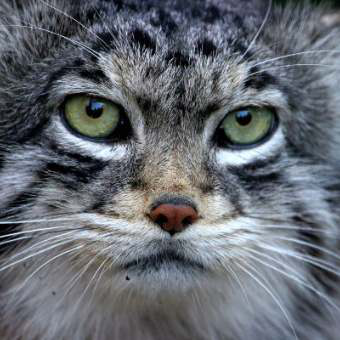

In [19]:
img

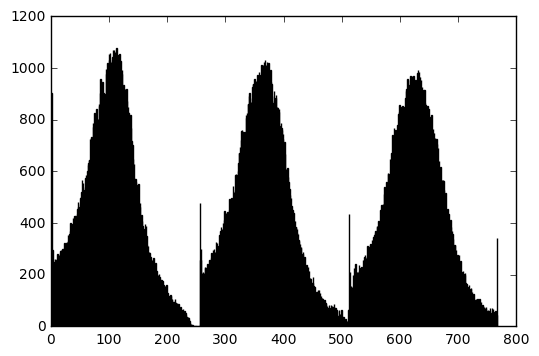

In [20]:
plt.bar(np.arange(len(search_histogram)),search_histogram)
plt.show()

In [21]:
img1 = Image.open(final_result)

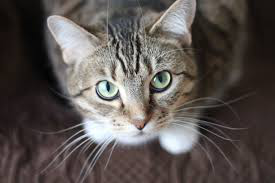

In [22]:
img1

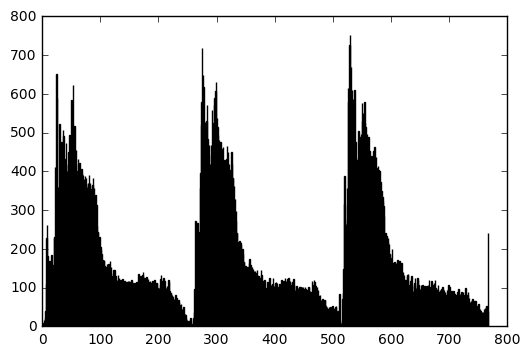

In [23]:
histogram1 = array(img1.histogram())
plt.bar(np.arange(len(histogram1)),histogram1)
plt.show()

#Image search application with tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.contrib.slim as slim
import pandas as pd
from scipy.spatial.distance import cdist
from matplotlib import gridspec

In [2]:
path= "/Tutorial/data1/"
path1= '/Tutorial/model/'
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(path, one_hot=True)

Extracting C:/Users/Palash Goyal/Documents/DeepLearning/Tutorial/data1/train-images-idx3-ubyte.gz
Extracting C:/Users/Palash Goyal/Documents/DeepLearning/Tutorial/data1/train-labels-idx1-ubyte.gz
Extracting C:/Users/Palash Goyal/Documents/DeepLearning/Tutorial/data1/t10k-images-idx3-ubyte.gz
Extracting C:/Users/Palash Goyal/Documents/DeepLearning/Tutorial/data1/t10k-labels-idx1-ubyte.gz


In [3]:
train_images = np.array([im.reshape((28,28,1)) for im in mnist.train.images])
test_images = np.array([im.reshape((28,28,1)) for im in mnist.test.images])
len_test = len(mnist.test.images)
len_train = len(mnist.train.images)

In [4]:
def show_image(idxs, data):
    if type(idxs) != np.ndarray:
        idxs = np.array([idxs])
    fig = plt.figure()
    gs = gridspec.GridSpec(1,len(idxs))
    for i in range(len(idxs)):
        ax = fig.add_subplot(gs[0,i])
        ax.imshow(data[idxs[i],:,:,0])
        ax.axis('off')
    plt.show()

In [5]:
def mynet(input, reuse=False):
    with tf.name_scope("model"):
        with tf.variable_scope("conv1") as scope:
            net = tf.contrib.layers.conv2d(input, 32, [7, 7], activation_fn=tf.nn.relu, padding='SAME',
            weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),scope=scope,reuse=reuse)
            net = tf.contrib.layers.max_pool2d(net, [2, 2], padding='SAME')

        with tf.variable_scope("conv2") as scope:
            net = tf.contrib.layers.conv2d(net, 64, [5, 5], activation_fn=tf.nn.relu, padding='SAME',
            weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),scope=scope,reuse=reuse)
            net = tf.contrib.layers.max_pool2d(net, [2, 2], padding='SAME')

        with tf.variable_scope("conv3") as scope:  
            net = tf.contrib.layers.conv2d(net, 128, [3, 3], activation_fn=tf.nn.relu, padding='SAME',
            weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),scope=scope,reuse=reuse)
            net = tf.contrib.layers.max_pool2d(net, [2, 2], padding='SAME')

        net = tf.contrib.layers.flatten(net)

    return net

In [6]:
img_placeholder = tf.placeholder(tf.float32, [None, 28, 28, 1], name='img')
net = mynet(img_placeholder, reuse=False)

In [7]:
import os
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(path1,'model.ckpt'))
    train_feat = sess.run(net, feed_dict={img_placeholder:train_images[:10000]})

In [8]:
idx = np.random.randint(0, len_test)
im = test_images[idx]

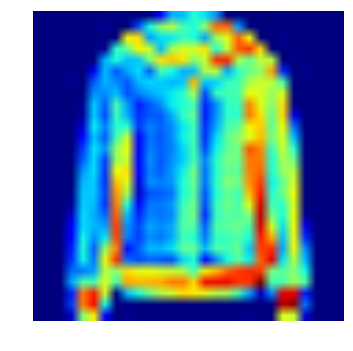

Image from id: 8960


In [9]:
show_image(idx, test_images)
print ("Image from id:", idx)

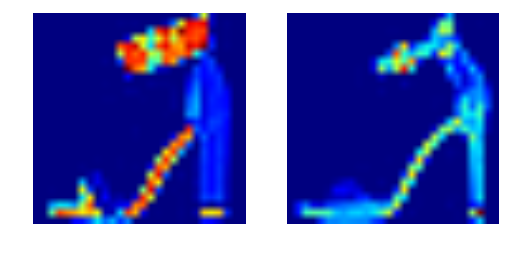

ids of images: [5251 8576]


In [10]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(path1,'model.ckpt'))
    search_feat = sess.run(net, feed_dict={img_placeholder:[im]})
    
dist = cdist(train_feat, search_feat, 'cosine')
rank = np.argsort(dist.ravel())

n = 2
show_image(rank[:n], train_images)
print ("ids of images:", rank[:n])